# 1.how to handle Class imbalance in dataset

In [1]:
import pandas as pd
df=pd.read_csv("data.csv")

In [2]:
df

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes
...,...,...,...,...,...,...,...
866,Buffaloes,Fever,Difficulty breathing,Poor Appetite,Eye and Skin change,Unable to exercise,Yes
867,Buffaloes,Fever,Loss of appetite,Lession on the skin,Lethargy,Joint Pain,Yes
868,Buffaloes,Lesions in the nasal cavity,Lesions on nose,Vomiting,Noisy Breathing,Lesions on nose,Yes
869,Buffaloes,Hair loss,Dandruff,Vomiting,Crusting of the skin,Ulcerated skin,Yes


In [3]:
df['Dangerous'].unique()

array(['Yes', 'No', nan], dtype=object)

In [4]:
df.isnull().sum()

AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
symptoms4     0
symptoms5     0
Dangerous     2
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
symptoms4     0
symptoms5     0
Dangerous     0
dtype: int64

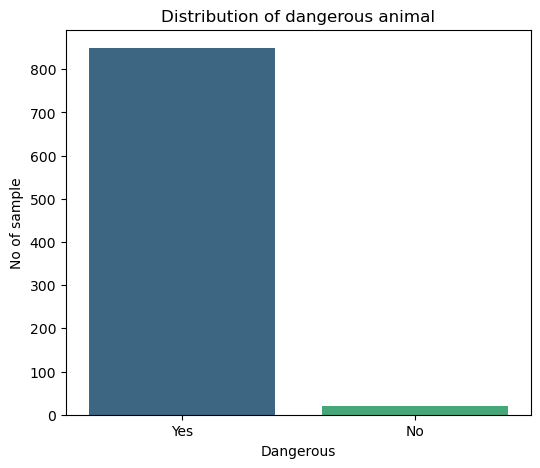

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
count=df['Dangerous'].value_counts()
plt.figure(figsize=(6,5))
sns.barplot(x=count.index,y=count.values,palette='viridis')
plt.title("Distribution of dangerous animal")
plt.xlabel("Dangerous")
plt.ylabel("No of sample")
plt.show()

**undersampling: reducing the number of samples in the majority class**

In [7]:
from sklearn.utils import resample
major=df[df['Dangerous']=='Yes']
minor=df[df['Dangerous']=='No']
undersample=resample(major,replace=False,n_samples=len(minor),random_state=42)
df_undersample=pd.concat([undersample,minor])
print(df_undersample['Dangerous'].value_counts())

Dangerous
Yes    20
No     20
Name: count, dtype: int64


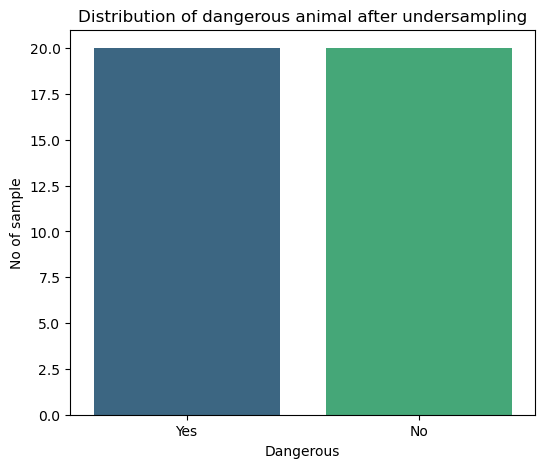

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
count=df_undersample['Dangerous'].value_counts()
plt.figure(figsize=(6,5))
sns.barplot(x=count.index,y=count.values,palette='viridis')
plt.title("Distribution of dangerous animal after undersampling")
plt.xlabel("Dangerous")
plt.ylabel("No of sample")
plt.show()

**oversampling: increasing the number of samples in minority class**

In [9]:
from sklearn.utils import resample
major=df[df['Dangerous']=='Yes']
minor=df[df['Dangerous']=='No']
oversample=resample(minor,replace=True,n_samples=len(major),random_state=42)
df_oversample=pd.concat([oversample,major])
print(df_oversample['Dangerous'].value_counts())

Dangerous
No     849
Yes    849
Name: count, dtype: int64


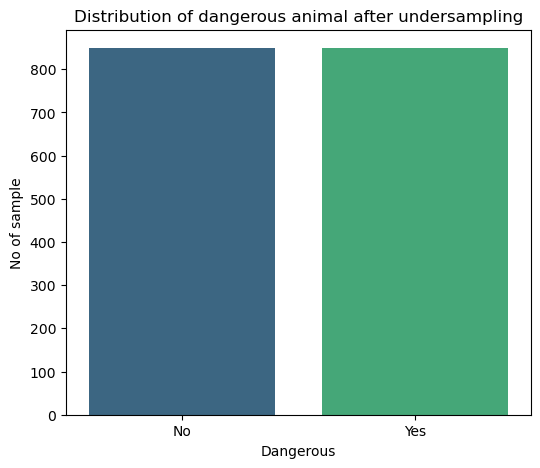

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
count=df_oversample['Dangerous'].value_counts()
plt.figure(figsize=(6,5))
sns.barplot(x=count.index,y=count.values,palette='viridis')
plt.title("Distribution of dangerous animal after undersampling")
plt.xlabel("Dangerous")
plt.ylabel("No of sample")
plt.show()

**SMOTE: Synthetic minority oversampling technique: it generates new instances for the minority class(duplicating)**

In [11]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn.preprocessing import LabelEncoder
x=df.drop('Dangerous',axis=1)
y=df['Dangerous']
labelencoder=LabelEncoder()
y=labelencoder.fit_transform(y)

In [13]:
x.dtypes

AnimalName    object
symptoms1     object
symptoms2     object
symptoms3     object
symptoms4     object
symptoms5     object
dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
categorical_cols = x.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])
    label_encoders[col] = le
print(x.dtypes)


AnimalName    int32
symptoms1     int32
symptoms2     int32
symptoms3     int32
symptoms4     int32
symptoms5     int32
dtype: object


In [15]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(k_neighbors=1,random_state=42)
x_resampled,y_resampled=smote.fit_resample(x,y)
df_oversampled=pd.concat([pd.DataFrame(x_resampled, columns=x.columns), pd.Series(y_resampled, name='Dangerous')], axis=1)
print(df_oversampled['Dangerous'].value_counts())

Dangerous
1    849
0    849
Name: count, dtype: int64


# Ensemble techniques

**max voting**

In [3]:
import pandas as pd
df=pd.read_csv("plant_growth_data.csv")
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [5]:
df.isna().sum()

Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in ['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [7]:
x = df.drop('Growth_Milestone', axis=1)
y= df['Growth_Milestone']

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [12]:
log_clf = LogisticRegression()
tree_clf = DecisionTreeClassifier()
svm_clf = SVC()


In [13]:
voting_clf = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('dt', tree_clf),
    ('svc', svm_clf)
], voting='hard')

In [15]:
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()), ('svc', SVC())])

In [17]:
predictions = voting_clf.predict(x_test)

In [19]:
accuracy = voting_clf.score(x_test, y_test)
print(f"Max Voting Ensemble Accuracy: {accuracy:.2f}")

Max Voting Ensemble Accuracy: 0.52


**Soft Voting: Combines the predicted probabilities from each model and selects the class with the highest average probability.**

In [20]:
logR= LogisticRegression()
dtc= DecisionTreeClassifier()
svm= SVC(probability=True)

In [21]:
voting_clf = VotingClassifier(estimators=[
    ('lr', logR),
    ('dt', dtc),
    ('svc', svm)
], voting='soft')

In [22]:
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [24]:
predictions = voting_clf.predict(x_test)

In [26]:
accuracy = voting_clf.score(x_test, y_test)
print(f"Soft Voting Ensemble Accuracy: {accuracy:.2f}")

Soft Voting Ensemble Accuracy: 0.59


**averaging**

In [56]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=42)
model2 = KNeighborsClassifier()
model3= LogisticRegression(max_iter=1000)
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
pred1=model1.predict_proba(x_test)
pred2=model2.predict_proba(x_test)
pred3=model3.predict_proba(x_test)
finalpred=(pred1+pred2+pred3)/3

In [57]:
y_pred_ensemble = np.argmax(finalpred, axis=1)
print("Averaging Ensemble Model Performance on Testing Set:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_ensemble):.2f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble))

Averaging Ensemble Model Performance on Testing Set:
Accuracy: 0.57

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.41      0.49        29
           1       0.55      0.72      0.63        29

    accuracy                           0.57        58
   macro avg       0.58      0.57      0.56        58
weighted avg       0.58      0.57      0.56        58



**weighted averaging**

In [58]:
weight1=0.4
weight2=0.3
weight3=0.3
weighted_pred_prob = (weight1 * pred1 + weight2 * pred2 + weight3 * pred3)

y_pred_ensemble = np.argmax(weighted_pred_prob, axis=1)

print("Weighted Averaging Ensemble Model Performance on Testing Set:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_ensemble):.2f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble))

Weighted Averaging Ensemble Model Performance on Testing Set:
Accuracy: 0.59

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.41      0.50        29
           1       0.56      0.76      0.65        29

    accuracy                           0.59        58
   macro avg       0.60      0.59      0.57        58
weighted avg       0.60      0.59      0.57        58

